<a href="https://colab.research.google.com/github/a-donat/Benchmarks_PyCaret/blob/main/Predicting_Concrete_Strength.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Set-Up

## I.A. Import Libraries and Download Data

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c playground-series-s3e9
! unzip '/content/playground-series-s3e9.zip' -d '/content/concrete'

In [ ]:
! pip install pycaret

In [5]:
#import matplotlib.pyplot as plt
#import seaborn as sns
#import VisualizeDataAbbrev as viz

import numpy as np
import pandas as pd
from pycaret.regression import *
from sklearn.model_selection import train_test_split

## I.B. Load Data and Check Data Integrity

In [6]:
ds_df = pd.read_csv("/content/concrete/train.csv")


In [7]:
ds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5407 entries, 0 to 5406
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         5407 non-null   int64  
 1   CementComponent            5407 non-null   float64
 2   BlastFurnaceSlag           5407 non-null   float64
 3   FlyAshComponent            5407 non-null   float64
 4   WaterComponent             5407 non-null   float64
 5   SuperplasticizerComponent  5407 non-null   float64
 6   CoarseAggregateComponent   5407 non-null   float64
 7   FineAggregateComponent     5407 non-null   float64
 8   AgeInDays                  5407 non-null   int64  
 9   Strength                   5407 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 422.5 KB


In [8]:
ds_df.nunique()

id                           5407
CementComponent               314
BlastFurnaceSlag              224
FlyAshComponent               177
WaterComponent                215
SuperplasticizerComponent     112
CoarseAggregateComponent      342
FineAggregateComponent        376
AgeInDays                      15
Strength                      843
dtype: int64

In [9]:
ds_df.corr().round(2)

,id,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
id,1.00,-0.03,-0.02,0.05,-0.01,0.00,-0.00,0.02,0.01,0.01
CementComponent,-0.03,1.00,-0.37,-0.30,-0.01,0.03,0.05,-0.34,0.10,0.16
BlastFurnaceSlag,-0.02,-0.37,1.00,-0.17,0.05,0.11,-0.28,-0.17,-0.06,0.06
FlyAshComponent,0.05,-0.30,-0.17,1.00,-0.36,0.46,-0.08,0.11,-0.13,0.03
WaterComponent,-0.01,-0.01,0.05,-0.36,1.00,-0.65,-0.06,-0.35,0.24,-0.11
SuperplasticizerComponent,0.00,0.03,0.11,0.46,-0.65,1.00,-0.31,0.17,-0.17,0.21
CoarseAggregateComponent,-0.00,0.05,-0.28,-0.08,-0.06,-0.31,1.00,-0.26,-0.02,-0.10
FineAggregateComponent,0.02,-0.34,-0.17,0.11,-0.35,0.17,-0.26,1.00,-0.11,-0.07
AgeInDays,0.01,0.10,-0.06,-0.13,0.24,-0.17,-0.02,-0.11,1.00,0.33
Strength,0.01,0.16,0.06,0.03,-0.11,0.21,-0.10,-0.07,0.33,1.00


In [10]:
ds_df.corr()["Strength"]

id                           0.011853
CementComponent              0.158000
BlastFurnaceSlag             0.057506
FlyAshComponent              0.031606
WaterComponent              -0.113678
SuperplasticizerComponent    0.208249
CoarseAggregateComponent    -0.098410
FineAggregateComponent      -0.073900
AgeInDays                    0.334204
Strength                     1.000000
Name: Strength, dtype: float64


# II. Preprocessing

In [11]:
train_df, test_df = train_test_split(
    ds_df, test_size=0.20, random_state=1)

# III. Create Models

In [12]:
reg_models = setup(
    data=train_df, target='Strength', session_id=123,
    ignore_features=['id'])


,Description,Value
0,Session id,123
1,Target,Strength
2,Target type,Regression
3,Original data shape,"(4325, 10)"
4,Transformed data shape,"(4325, 9)"
5,Transformed train set shape,"(3027, 9)"
6,Transformed test set shape,"(1298, 9)"
7,Ignore features,1
8,Numeric features,8
9,Preprocess,True


In [13]:
best_model = compare_models(fold=5)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,9.4188,149.8360,12.2394,0.4444,0.3840,0.3611,0.3540
lightgbm,Light Gradient Boosting Machine,9.7565,160.6296,12.6712,0.4043,0.3929,0.3670,0.6100
ada,AdaBoost Regressor,10.1855,160.9414,12.6841,0.4033,0.4080,0.4136,0.1440
rf,Random Forest Regressor,10.0302,170.8494,13.0664,0.3663,0.4042,0.3768,1.0520
xgboost,Extreme Gradient Boosting,10.1770,177.6699,13.3254,0.3410,0.4127,0.3788,0.3220
et,Extra Trees Regressor,10.4159,186.9002,13.6637,0.3065,0.4242,0.3885,0.5940
knn,K Neighbors Regressor,10.9452,197.8691,14.0647,0.2660,0.4443,0.4294,0.0900
ridge,Ridge Regression,11.3644,211.3274,14.5360,0.2164,0.4759,0.4928,0.0400
lar,Least Angle Regression,11.3644,211.3274,14.5360,0.2164,0.4759,0.4928,0.0400
lr,Linear Regression,11.3644,211.3274,14.5360,0.2164,0.4759,0.4928,0.6700


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

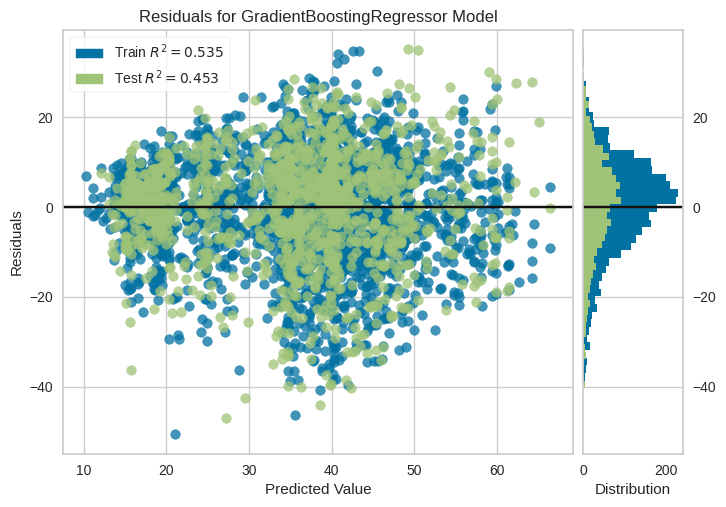

In [14]:
plot_model(best_model)